In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("deliverytime.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.632367,0.327708,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


Type_of_vehicle
bicycle              26.426471
electric_scooter     24.470110
motorcycle           27.605674
scooter              24.480754
Name: Time_taken(min), dtype: float64


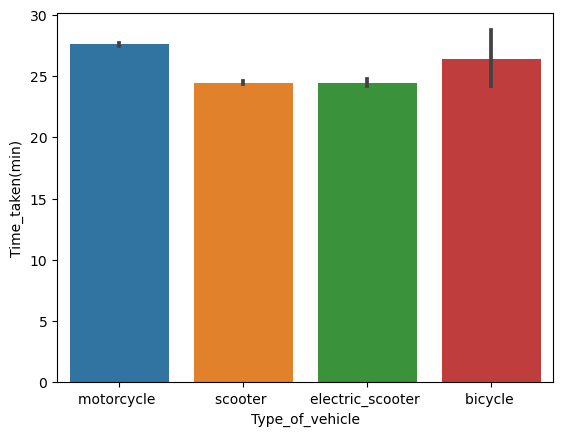

In [10]:
# Teslimat süresi ile teslimat aracının türü (Type_of_vehicle) arasında bir bağlantı olup olmadığını gösterebilecek bir tablo.
sns.barplot(x="Type_of_vehicle",y="Time_taken(min)",data = df);
type_of_vehicle_vs_time = df.groupby("Type_of_vehicle")["Time_taken(min)"].mean()
print(type_of_vehicle_vs_time)

Type of vechile value is : 
  motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64


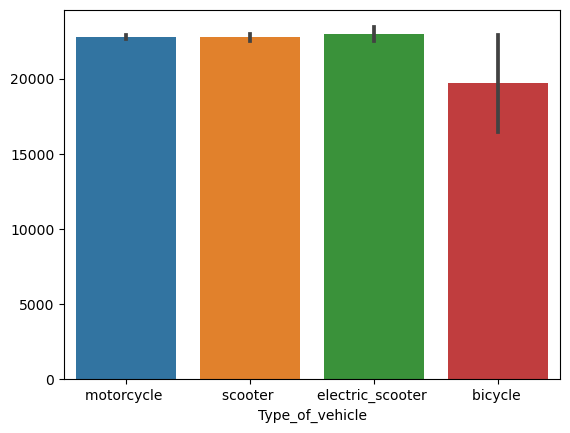

In [14]:
# en çok kullanılan araç türü
sns.barplot(x="Type_of_vehicle",y=df.Type_of_vehicle.index,data = df);
print("Type of vechile value is : \n ",df["Type_of_vehicle"].value_counts())

Type_of_order
Meal       26.419270
Snack      26.286309
Buffet     26.283511
Drinks     26.187953
Name: Time_taken(min), dtype: float64


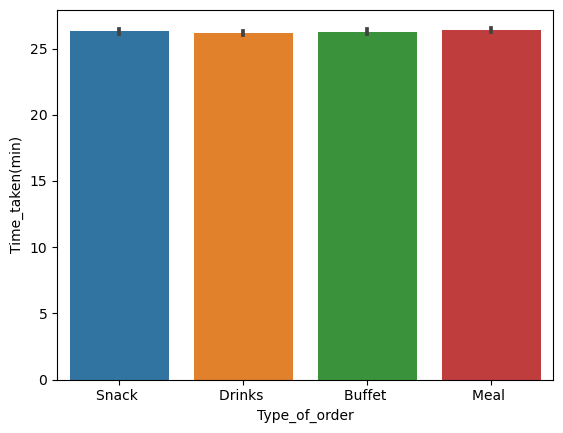

In [21]:
#Hangi teslimat türü (Type_of_order) en uzun ortalama teslimat süresine sahiptir.
sns.barplot(x="Type_of_order",y="Time_taken(min)",data = df);
order_most_timeGet = df.groupby("Type_of_order")["Time_taken(min)"].mean().sort_values(ascending=False)
print(order_most_timeGet)

In [25]:
# Her bir teslimatçının (Delivery_person_ID) aldığı ortalama puanı hesaplayıp en yüksek puanlı 5 teslimatçı.
avg_ratings_person_id = df.groupby("Delivery_person_ID")["Delivery_person_Ratings"].mean().sort_values(ascending=False).head(5)
print(avg_ratings_person_id)

Delivery_person_ID
KOCRES13DEL01     4.846667
ALHRES08DEL03     4.833333
KOLRES14DEL01     4.827273
BHPRES08DEL03     4.825000
LUDHRES20DEL03    4.823077
Name: Delivery_person_Ratings, dtype: float64


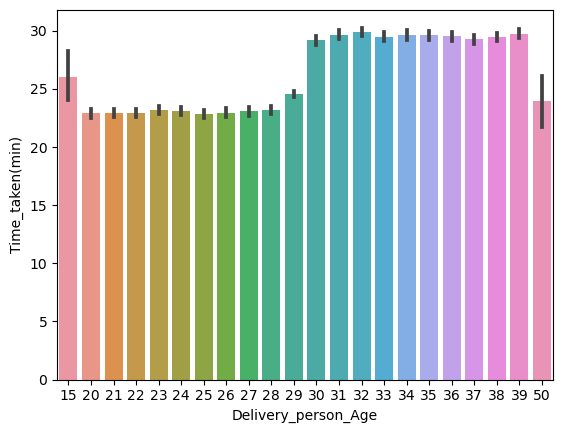

In [29]:
# Teslimatçının yaşının (Delivery_person_Age) teslimat süresine (Time_taken(min)) etkisini analiz etmek için bir görselleştirme.
sns.barplot(x="Delivery_person_Age",y="Time_taken(min)",data = df);

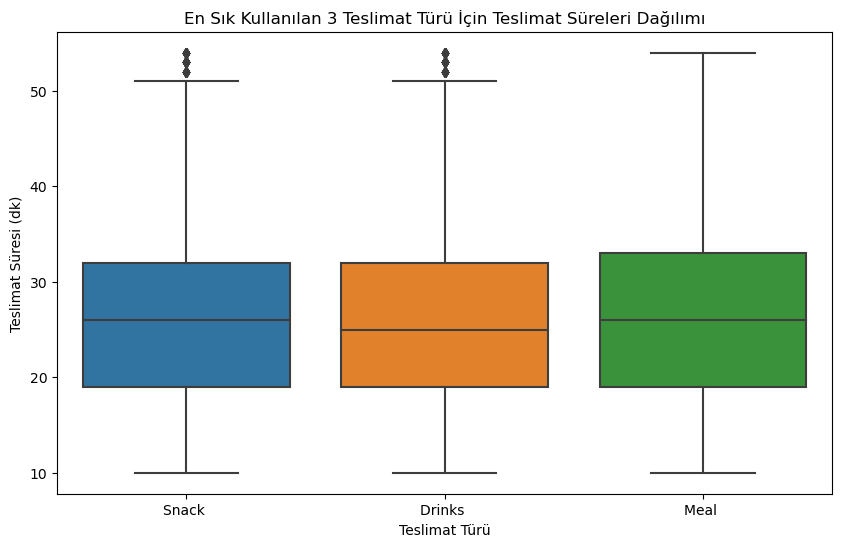

In [34]:
top_3_orders = df["Type_of_order"].value_counts().head(3).index

filtered_data = df[df["Type_of_order"].isin(top_3_orders)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Type_of_order", y="Time_taken(min)", data=filtered_data)
plt.title("En Sık Kullanılan 3 Teslimat Türü İçin Teslimat Süreleri Dağılımı")
plt.xlabel("Teslimat Türü")
plt.ylabel("Teslimat Süresi (dk)")
plt.show()

### Machine Learning Section

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Kategorik sütunları sayısal verilere dönüştürme
label_encoder = LabelEncoder()
df['Type_of_order'] = label_encoder.fit_transform(df['Type_of_order'])
df['Type_of_vehicle'] = label_encoder.fit_transform(df['Type_of_vehicle'])

In [48]:
# Bağımlı ve bağımsız değişkenler
X = df.drop(["Time_taken(min)", "ID", "Delivery_person_ID"], axis=1)
y = df["Time_taken(min)"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Random Forest Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# tahmin
y_pred = rf_model.predict(X_test)

In [52]:
# Model Performansı
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 62.2225770971936
R² Score: 0.2903296144435972
